# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# Importing Scikitlearn packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# Loading the Data Set
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename, header=0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [ ]:
df.head()

In [ ]:
# Checking data for null values
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

In [4]:
# Replacing null values with the mean for chosen columns
mean_socialsupport = df['Social support'].mean()
df['Social support'].fillna(value=mean_socialsupport, inplace=True)

mean_generosity = df['Generosity'].mean().round()
df['Generosity'].fillna(value=mean_generosity, inplace=True)

In [ ]:
# Checking the value for each mean
print(mean_socialsupport)
print(mean_generosity)

In [ ]:
# Checking to make sure the null values were replaced
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

In [5]:
# Feature list
feature_list = list(df[["Social support", "Generosity"]])

In [6]:
# Assigning a label and features
y = df['Life Ladder'].astype('int')
X = df[feature_list].astype('int')

In [7]:
# Setting up the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
# LogisticRegression Model creation
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_lr_pred = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 1.163886844955052
[LR] R2: -0.00012057635497697561


In [12]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
# Decision Tree Model creation
param_grid = dict(max_depth = [4, 8], min_samples_leaf=[25, 50])

print('Running Grid Search')
dt_regressor = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search = dt_grid.fit(X_train, y_train)
print('Done')

rmse_DT = -1*dt_grid_search.best_score_
print('[DT] RMSE for the best model is: {:.2F}'.format(rmse_DT))

dt_best_params = dt_grid_search.best_estimator_.get_params()
dt_best_params

dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'], min_samples_leaf=dt_best_params['min_samples_leaf'])
dt_model.fit(X_train, y_train)

y_dt_pred = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

Running Grid Search
Done
[DT] RMSE for the best model is: 1.18
[DT] Root Mean Squared Error: 1.163886844955052
[DT] R2: -0.00012057635497697561


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
# GBDT Model creation
print('Begin GBDT Implementation...')
gbdt_model = GradientBoostingClassifier(max_depth=3, n_estimators=300)
gbdt_model.fit(X_train, y_train)

y_gbdt_pred = gbdt_model.predict(X_test)
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))

Begin GBDT Implementation...
[GBDT] Root Mean Squared Error: 1.163886844955052
[GBDT] R2: -0.00012057635497697561


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Random Forest Model creation
print('Begin Random Forest Implementation...')
rf_model = RandomForestClassifier(max_depth=32, n_estimators=300)
rf_model.fit(X_train, y_train)
print('End')

y_rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))

Begin Random Forest Implementation...
End
[RF] Root Mean Squared Error: 1.354632587859425
[RF] R2: -0.00012057635497697561


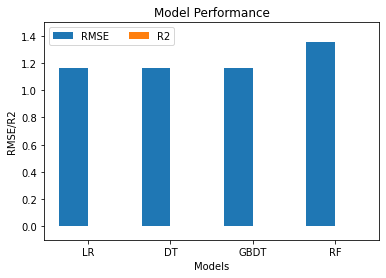

In [19]:
#Graphed Results
RMSE_Results = [lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [lr_r2, dt_r2, gbdt_r2, rf_r2]
labels = ['LR', 'DT', 'GBDT', 'RF']

rg = np.arange(4)
width = 0.35
plt.bar(rg, RMSE_Results, width, label='RMSE')
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg+width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([-0.1,1.5])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

In [20]:
from sklearn.metrics import roc_curve, auc

Begin LR Implementation...
End
Computing ROC Curve...
End
Plotting ROC Curve...


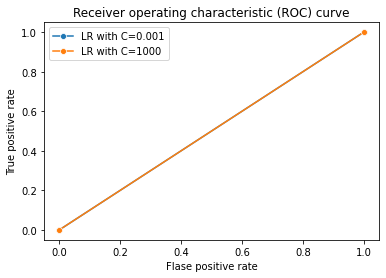

In [24]:
# Checking two classifiers
print('Begin LR Implementation...')

lr_1_model = LogisticRegression(C=0.001)
lr_1_model.fit(X_train, y_train)
lr_1_predictions = list(lr_1_model.predict_proba(X_test)[:,1])

lr_1000_model = LogisticRegression(C=1000)
lr_1000_model.fit(X_train, y_train)
lr_1000_predictions = list(lr_1000_model.predict_proba(X_test)[:,1])

print('End')

print('Computing ROC Curve...')
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, lr_1_predictions, pos_label=7)
fpr_1000, tpr_1000, thresholds_1000 = roc_curve(y_test, lr_1000_predictions, pos_label=7)
print('End')

print('Plotting ROC Curve...')
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_1, y=tpr_1, marker='o')
sns.lineplot(x=fpr_1000, y=tpr_1000, marker='o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("Flase positive rate")
plt.ylabel("True positive rate")
plt.legend(['LR with C=0.001', 'LR with C=1000'])
plt.show()

In [25]:
auc_1 = auc(fpr_1, tpr_1)
print("AUC of the Logistic Regression model with C=0.001 is {: .3f}".format(auc_2))

auc_10 = auc(fpr_1000, tpr_1000)
print("AUC of the Logistic Regression model with C=1000 is {: .3f}".format(auc_10))

AUC of the Logistic Regression model with C=0.001 is  0.500
AUC of the Logistic Regression model with C=1000 is  0.500


In [ ]:
# I've kinda hit a wall on where to take this model and this last week has just been very busy for me that I haven't been able 
# to devote the time needed for this project
# I know it's not perfect and I know I don't actually have a final answer or output to share, but I've enjoyed being able to 
# explore all of this and am looking forward with continuing to learn.
# Thank you so much for all of your help and input. It's been amazing!